# Temporal Demand Patterns and Seasonality 

In [1]:
# libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# import:
chicago = pd.read_csv('../chicago_2016.csv', parse_dates=["start_time","end_time"])

## Usage during a day
### Classification:
* Morning: 6 a.m. - 10 a.m.
* Mid-morning: 10 a.m. - 12 p.m.
* Noon: 12 p.m - 2 p.m.
* Afternoon: 2 p.m. - 5 p.m.
* Evening: 5 p.m. - 9 p.m.
* Night: 9 p.m. - 6 a.m.

In [3]:
# overview
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber


In [4]:
# compute driving time
chicago['driving_time'] = chicago['end_time']-chicago['start_time'] 

In [5]:
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber,0 days 00:04:00
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber,0 days 00:18:00
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber,0 days 00:04:00


In [6]:
chicago['start_time'].size

3595383

In [7]:
# drop rows where driving time is less than 1 min
for i in range(chicago['driving_time'].size-1):
    if chicago.at[i,'driving_time'].total_seconds() < 60:
        chicago = chicago.drop(i)

In [8]:
chicago['start_time'].size

3595325

In [9]:
# hinzufügen der Stunde des Starts
chicago['start_hour']= chicago["start_time"].apply(lambda x: x.hour)

In [10]:
# hinzufügen des Wochentags
chicago['weekday']= chicago["start_time"].apply(lambda x: x.weekday())

In [174]:
# hinzufügen des Monats
chicago['month']= chicago["start_time"].apply(lambda x: x.month)

In [175]:
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time,start_hour,weekday,month
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00,23,3,3
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00,23,3,3
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber,0 days 00:04:00,23,3,3
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber,0 days 00:18:00,23,3,3
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber,0 days 00:04:00,23,3,3


In [108]:
# Fahrten, die zu Morgenstunden starten, aggregieren
morning_start = chicago[(chicago['start_hour']>=6) & (chicago['start_hour']<10)]

In [109]:
morning_start['start_hour'].size

731906

In [110]:
# Fahrten, die zu Vormittagstunden starten, aggregieren
mid_morning_start = chicago[(chicago['start_hour']>=10) & (chicago['start_hour']<12)]


In [111]:
mid_morning_start['start_hour'].size

328205

In [112]:
# Fahrten, die zu Mittagstunden starten, aggregieren
noon_start = chicago[(chicago['start_hour']>=12) & (chicago['start_hour']<14)]

In [113]:
noon_start['start_hour'].size

427655

In [114]:
# Fahrten, die zu Nachmittagstunden starten, aggregieren
afternoon_start = chicago[(chicago['start_hour']>=14) & (chicago['start_hour']<17)]

In [115]:
afternoon_start['start_hour'].size

785056

In [116]:
# Fahrten, die zu Abendstunden starten, aggregieren
evening_start = chicago[(chicago['start_hour']>=17) & (chicago['start_hour']<21)]

In [117]:
evening_start.size

11312202

In [118]:
# Fahrten, die zu Nachtstunden starten, aggregieren
night_start = chicago[((chicago['start_hour']>=21) & (chicago['start_hour']<24)) | ((chicago['start_hour']>=0) & (chicago['start_hour']<6))]

In [119]:
night_start['start_hour'].size

294121

In [120]:
# Überprüfen, ob die Anzahl der Zeilen noch richtig ist
print(chicago['start_time'].size)
print(morning_start['start_hour'].size + mid_morning_start['start_hour'].size + noon_start['start_hour'].size + afternoon_start['start_hour'].size + evening_start['start_hour'].size + night_start['start_hour'].size)

3595325
3595325


In [121]:
start_hours = pd.DataFrame({'Time_Period': ['morning', 'mid-morning', 'noon', 'afternoon', 'evening', 'night'], 'Rides': [morning_start['start_hour'].size, mid_morning_start['start_hour'].size, noon_start['start_hour'].size,afternoon_start['start_hour'].size, evening_start['start_hour'].size, night_start['start_hour'].size]})

In [122]:
start_hours.head()

,Time_Period,Rides
0,morning,731906
1,mid-morning,328205
2,noon,427655
3,afternoon,785056
4,evening,1028382


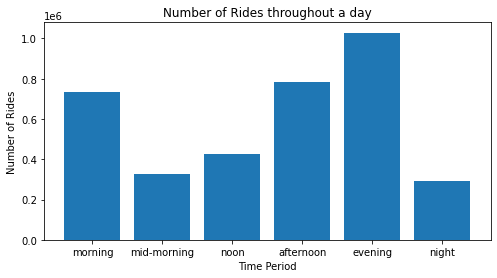

In [123]:
# Graph der die Anzahl der Fahrten an verschiedenen Zeitpunkten eines Tages darstellt 
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(start_hours['Time_Period'],start_hours['Rides'])
ax.set_xlabel("Time Period")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a day")

plt.show()

In [124]:
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time,start_hour,weekday
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00,23,3
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00,23,3
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber,0 days 00:04:00,23,3
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber,0 days 00:18:00,23,3
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber,0 days 00:04:00,23,3


In [133]:
monday = chicago[chicago['weekday']==0]
tuesday = chicago[chicago['weekday']==1]
wednesday = chicago[chicago['weekday']==2]
thursday = chicago[chicago['weekday']==3]
friday = chicago[chicago['weekday']==4]
saturday = chicago[chicago['weekday']==5]
sunday = chicago[chicago['weekday']==6]

In [134]:
weekly_rides = pd.DataFrame({'weekday': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 'rides': [monday['weekday'].size, tuesday['weekday'].size, wednesday['weekday'].size, thursday['weekday'].size, friday['weekday'].size, saturday['weekday'].size, sunday['weekday'].size]})

Text(0.5, 1.0, 'Number of Rides throughout a week')

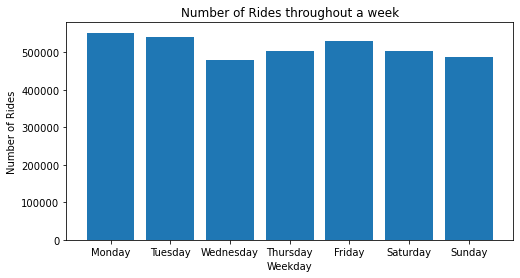

In [180]:
# Graph der die Anzahl der Fahrten im Verlauf der Woche darstellt
fig,ax = plt.subplots(figsize=(8,4))


ax.bar(weekly_rides['weekday'], weekly_rides['rides'] )
ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week")

In [158]:
# Fahrten am Morgen innerhalb einer Woche
morning_monday = morning_start[morning_start['weekday']==0]
morning_tuesday = morning_start[morning_start['weekday']==1]
morning_wednesday = morning_start[morning_start['weekday']==2]
morning_thursday = morning_start[morning_start['weekday']==3]
morning_friday = morning_start[morning_start['weekday']==4]
morning_saturday = morning_start[morning_start['weekday']==5]
morning_sunday =  morning_start[morning_start['weekday']==6]
morning_rides = np.array([morning_monday['start_hour'].size, morning_tuesday['start_hour'].size, morning_wednesday['start_hour'].size,  morning_thursday['start_hour'].size,  morning_friday['start_hour'].size,  morning_saturday['start_hour'].size,  morning_sunday['start_hour'].size])

In [157]:
# Fahrten am Vormittag innerhalb einer Woche
midmorning_monday = mid_morning_start[mid_morning_start['weekday']==0]
midmorning_tuesday = mid_morning_start[mid_morning_start['weekday']==1]
midmorning_wednesday = mid_morning_start[mid_morning_start['weekday']==2]
midmorning_thursday = mid_morning_start[mid_morning_start['weekday']==3]
midmorning_friday = mid_morning_start[mid_morning_start['weekday']==4]
midmorning_saturday = mid_morning_start[mid_morning_start['weekday']==5]
midmorning_sunday =  mid_morning_start[mid_morning_start['weekday']==6]
midmorning_rides = np.array([midmorning_monday['start_hour'].size, midmorning_tuesday['start_hour'].size, midmorning_wednesday['start_hour'].size,  midmorning_thursday['start_hour'].size,  midmorning_friday['start_hour'].size,  midmorning_saturday['start_hour'].size,  midmorning_sunday['start_hour'].size])

In [160]:
# Fahrten am Mittag innerhalb einer Woche
noon_monday = noon_start[noon_start['weekday']==0]
noon_tuesday = noon_start[noon_start['weekday']==1]
noon_wednesday = noon_start[noon_start['weekday']==2]
noon_thursday = noon_start[noon_start['weekday']==3]
noon_friday = noon_start[noon_start['weekday']==4]
noon_saturday = noon_start[noon_start['weekday']==5]
noon_sunday =  noon_start[noon_start['weekday']==6]
noon_rides = np.array([noon_monday['start_hour'].size, noon_tuesday['start_hour'].size, noon_wednesday['start_hour'].size,  noon_thursday['start_hour'].size,  noon_friday['start_hour'].size, noon_saturday['start_hour'].size, noon_sunday['start_hour'].size])

In [161]:
# Fahrten am Nachmittag innerhalb einer Woche
afternoon_monday = afternoon_start[afternoon_start['weekday']==0]
afternoon_tuesday = afternoon_start[afternoon_start['weekday']==1]
afternoon_wednesday = afternoon_start[afternoon_start['weekday']==2]
afternoon_thursday = afternoon_start[afternoon_start['weekday']==3]
afternoon_friday = afternoon_start[afternoon_start['weekday']==4]
afternoon_saturday = afternoon_start[afternoon_start['weekday']==5]
afternoon_sunday =  afternoon_start[afternoon_start['weekday']==6]
afternoon_rides = np.array([afternoon_monday['start_hour'].size, afternoon_tuesday['start_hour'].size, afternoon_wednesday['start_hour'].size,  afternoon_thursday['start_hour'].size,  afternoon_friday['start_hour'].size, afternoon_saturday['start_hour'].size, afternoon_sunday['start_hour'].size])

In [165]:
# Fahrten am Abend innerhalb einer Woche
evening_monday = evening_start[evening_start['weekday']==0]
evening_tuesday = evening_start[evening_start['weekday']==1]
evening_wednesday = evening_start[evening_start['weekday']==2]
evening_thursday = evening_start[evening_start['weekday']==3]
evening_friday = evening_start[evening_start['weekday']==4]
evening_saturday = evening_start[evening_start['weekday']==5]
evening_sunday =  evening_start[evening_start['weekday']==6]
evening_rides = np.array([evening_monday['start_hour'].size, evening_tuesday['start_hour'].size, evening_wednesday['start_hour'].size,  evening_thursday['start_hour'].size,  evening_friday['start_hour'].size, evening_saturday['start_hour'].size, evening_sunday['start_hour'].size])

In [169]:
# nächtliche Fahrten innerhalb einer Woche
night_monday = night_start[night_start['weekday']==0]
night_tuesday = night_start[night_start['weekday']==1]
night_wednesday = night_start[night_start['weekday']==2]
night_thursday = night_start[night_start['weekday']==3]
night_friday = night_start[night_start['weekday']==4]
night_saturday = night_start[night_start['weekday']==5]
night_sunday =  night_start[night_start['weekday']==6]
night_rides = np.array([night_monday['start_hour'].size, night_tuesday['start_hour'].size, night_wednesday['start_hour'].size,  night_thursday['start_hour'].size,  night_friday['start_hour'].size, night_saturday['start_hour'].size, night_sunday['start_hour'].size])

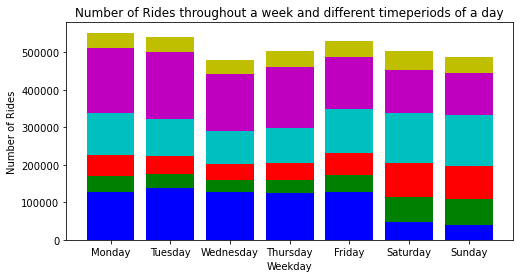

In [172]:
# Graph der die Anzahl der Fahrten innerhalb einer Woche und in verschiedenen Zeitperioden darstellt 
fig,ax = plt.subplots(figsize=(8,4))
weekly_rides_morning =pd.Series([morning_start[morning_start['weekday']==0].size, morning_start[morning_start['weekday']==1].size])
weekdays= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([morning_rides, midmorning_rides, noon_rides, afternoon_rides, evening_rides, night_rides])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week and different timeperiods of a day")

plt.show()

In [176]:
jan = chicago[chicago['month']==1]
feb = chicago[chicago['month']==2]
mar = chicago[chicago['month']==3]
apr = chicago[chicago['month']==4]
may = chicago[chicago['month']==5]
jun = chicago[chicago['month']==6]
jul = chicago[chicago['month']==7]
aug = chicago[chicago['month']==8]
sep = chicago[chicago['month']==9]
octo = chicago[chicago['month']==10]
nov = chicago[chicago['month']==11]
dec = chicago[chicago['month']==12]

In [185]:
monthly_rides = pd.DataFrame({'months': ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'], 'rides': [jan['weekday'].size, feb['weekday'].size, mar['weekday'].size, apr['weekday'].size, may['weekday'].size, jun['weekday'].size, jul['weekday'].size, aug['weekday'].size, sep['weekday'].size, octo['weekday'].size, nov['weekday'].size, dec['weekday'].size]})

Text(0.5, 1.0, 'Number of Rides throughout a Year')

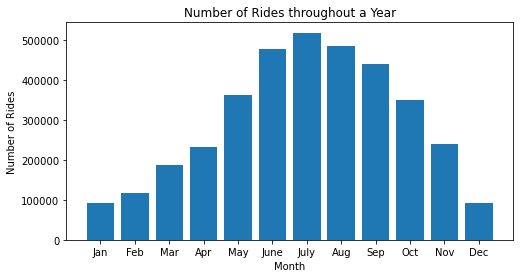

In [186]:
# Graph der die Anzahl der Fahrten im Verlauf des Jahres darstellt
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(monthly_rides['months'], monthly_rides['rides'] )
ax.set_xlabel("Month")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a Year")